[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/zdemeo/2d_heat_transfer_python/HEAD?labpath=2d_steady_state.ipynb)

## 2D Steady State Heat Conduction
### Background
A short, handwavy explanation of how this works.

2D Steady State Heat Equation
$$\frac{\partial T}{\partial t}=\alpha\left ( \frac{\partial ^2T}{\partial x^2} + \frac{\partial ^2T}{\partial y^2}\right )= 0$$

Given a uniformly spaced _m_ x _n_ grid with no internal heat generation, the above equation can be approximated as:
$$T_{m,n}=\frac{1}{4}\left ( T_{m-1,n} + T_{m+1,n} + T_{m,n-1} + T_{m,n+1} \right )$$

Essentially, the temperature at each point is the average of the surrounding points. Each iteration will increase the accuracy of the solution.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
%matplotlib notebook

In [2]:
def animate(i):
    """
    Clear current axis object and draw current temperature field  
    """
    ax.clear()
    plt.contourf(plate.grids[i], 8, cmap='rainbow')
    ax.set_title('n = %d' % (i+1,))

    # i == 0 seems to happen twice, so add colorbar when i == 1
    if i == 1:
        plt.colorbar(label='Temperature')

In [6]:
# Container for 2D plate
class Plate:

    def __init__(self, **kwargs):

        import numpy as np

        self.grids = []

        self.iterations = kwargs['iter']
        
        # Define plate size
        self.xmax = kwargs['xmax']  # Number of points in X
        self.ymax = kwargs['ymax']  # Number of points in Y

        # Define temperature boundary conditions
        self.top = kwargs['top']  # Top boundary temperature
        self.bottom = kwargs['bottom']  # Bottom  boundary temperature
        self.left = kwargs['left']  # Left boundary temperature
        self.right = kwargs['right']  # Right boundary temperature

        # Set initial conditions
        self.initial_temp = kwargs['initial_temp']

        self.grid = np.zeros((self.xmax, self.ymax)) + self.initial_temp

    def solve(self):
        """
        Compute the steady-state temperature distribution of the plate.
        Finite-Difference Formulation of Differential Equation
        """

        import time

        # Manually set boundary temperatures
        self.grid[0, :] = self.top
        self.grid[-1, :] = self.bottom
        self.grid[:, 0] = self.left
        self.grid[:, -1] = self.right

        start = time.time()

        # Take the average temperature of each node's neighbors. More iterations = more accurate solution
        # Vectorized for faster computation time
        for n in range(self.iterations):
            self.grid[1:-1, 1:-1] = 0.25*(self.grid[:-2, 1:-1] + self.grid[2:, 1:-1] + self.grid[1:-1, :-2] + self.grid[1:-1, 2:])
            #self.grid[1:-1, 1:-1] = 0.25*(self.grid[:-2, 1:-1] + self.grid[2:, 1:-1] + self.grid[1:-1, :-2] + self.grid[1:-1, 2:])
            #print(self.grid)
            self.grids.append(self.grid.copy())  # Create a copy of each iteration

        # Manually calculate the temperature at the corners
        self.grid[0, 0] = 0.5 * (self.grid[1, 0] + self.grid[0, 1])  # Upper left
        self.grid[-1, 0] = 0.5 * (self.grid[-2, 0] + self.grid[-1, 1])  # Lower left
        self.grid[0, -1] = 0.5 * (self.grid[0, -2] + self.grid[1, -1])  # Upper right
        self.grid[-1, -1] = 0.5 * (self.grid[-1, -2] + self.grid[-2, -1])  # Lower right

        end = time.time() - start

        print('Time elapsed: {time} s'.format(time=end))

Let's look at a small number of iterations:

In [7]:
# Number of solver iterations. More iterations = more accurate
iterations = 5
ani_interval = 100  # Delay between each frame (milliseconds)

# Create instance of plate and calculate temperature field
plate = Plate(xmax=50, ymax=50, top=20, bottom=100, left=10, right=150, initial_temp=20, iter=iterations)
plate.solve()

# Plot and animate
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, animate, iterations, interval=ani_interval, blit=False, repeat=False)
plt.show()

ValueError: operands could not be broadcast together with shapes (48,49) (49,48) 

Not great. The temperature field is not physical given the boundary conditions. Try again with more iterations

Time elapsed: 0.008139848709106445 s


<IPython.core.display.Javascript object>


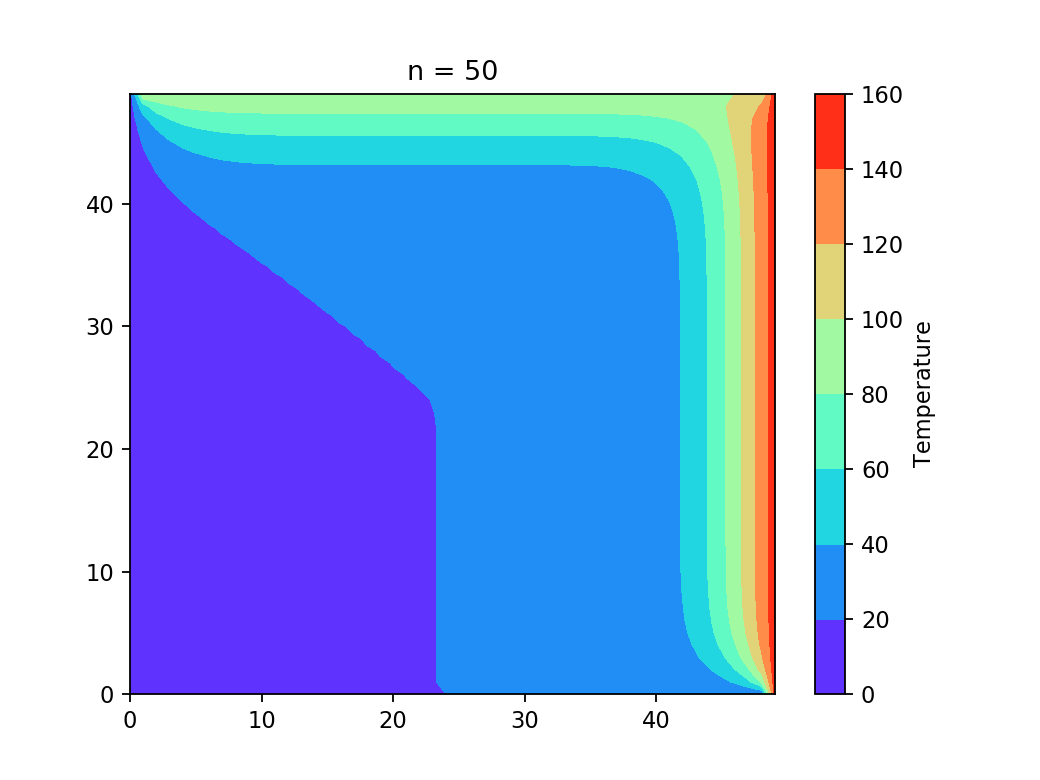

In [35]:
# Number of solver iterations. More iterations = more accurate
iterations = 50
ani_interval = 10  # Delay between each frame (milliseconds)

# Create instance of plate and calculate temperature field
plate = Plate(xmax=50, ymax=50, top=20, bottom=100, left=10, right=150, initial_temp=20, iter=iterations)
plate.solve()

# Plot and animate
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, animate, iterations, interval=ani_interval, blit=False, repeat=False)
plt.show()

Better, but the bottom boundary still hasn't hit the right temperature. Let's try a lot of interations.

Time elapsed: 0.06203317642211914 s


<IPython.core.display.Javascript object>


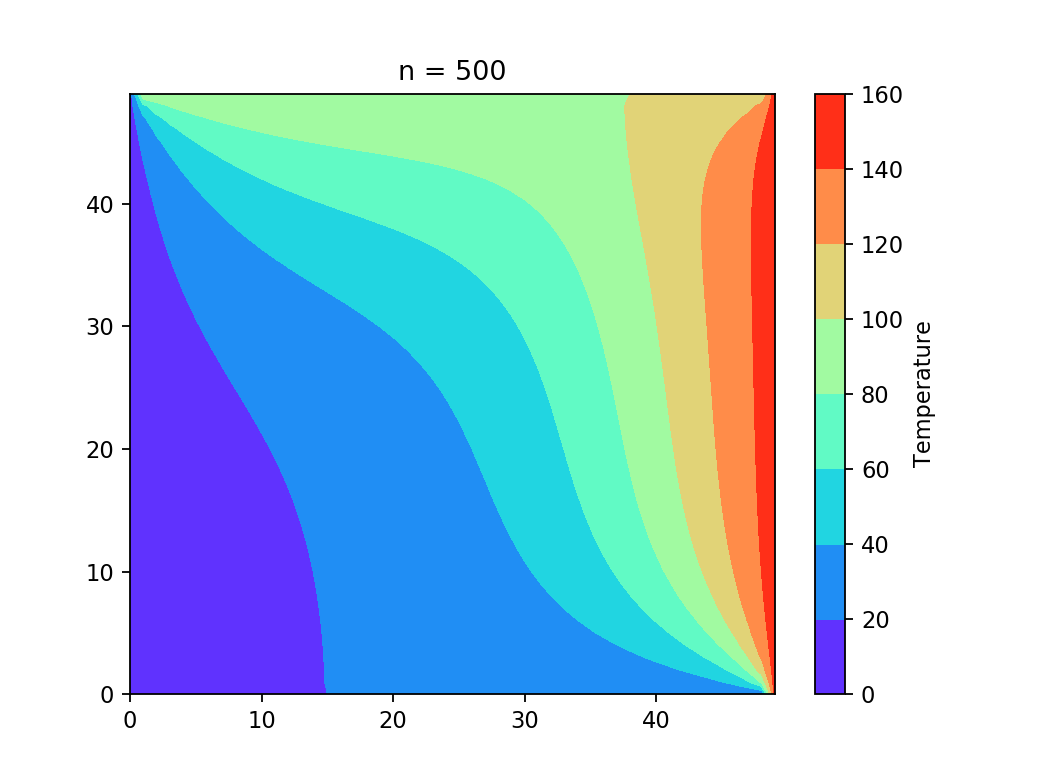

In [36]:
# Number of solver iterations. More iterations = more accurate
iterations = 500
ani_interval = 1  # Delay between each frame (milliseconds)

# Create instance of plate and calculate temperature field
plate = Plate(xmax=50, ymax=50, top=20, bottom=100, left=10, right=150, initial_temp=20, iter=iterations)
plate.solve()

# Plot and animate
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, animate, iterations, interval=ani_interval, blit=False, repeat=False)
plt.show()

As you can see, this temperature field is much closer to what you might expect, but you need many more iterations to see the converged solution. Disable animation for this next one--it's very slow in Jupyter Notebook.

In [ ]:
# Number of solver iterations. More iterations = more accurate
iterations = 500000
ani_interval = 1  # Delay between each frame (milliseconds)

# Create instance of plate and calculate temperature field
plate = Plate(xmax=50, ymax=50, top=20, bottom=100, left=10, right=150, initial_temp=20, iter=iterations)
plate.solve()

# Plot and animate
fig, ax = plt.subplots()
plt.contourf(plate.grid, 8, cmap='rainbow')
plt.colorbar(label='Temperature')
plt.show()